In [1]:
from typing import List

from leabra7 import net as nt
from leabra7 import specs as sp
from leabra7 import rand as rd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

# Two Neuron Network

### Network Creation

In [2]:
# Create the network
net = nt.Net()

# Set options for our layers
layer_spec = sp.LayerSpec(
    # For each layer, log the unit potential
    log_on_cycle=("unit_v_m", "unit_act", "unit_i_net",
                  "unit_net", "unit_gc_i", "unit_adapt",
                  "unit_spike")
)

# Create our layers and projections
net.new_layer("input", 1, layer_spec)
net.new_layer("output", 1, layer_spec)
net.new_projn("proj1", "input", "output")

### Run Network

In [3]:
# Clamp inputs
net.clamp_layer(name = "input", acts = [1])

# Run 200 cycles
for i in range(200):
    net.cycle()

### Graphing Logs

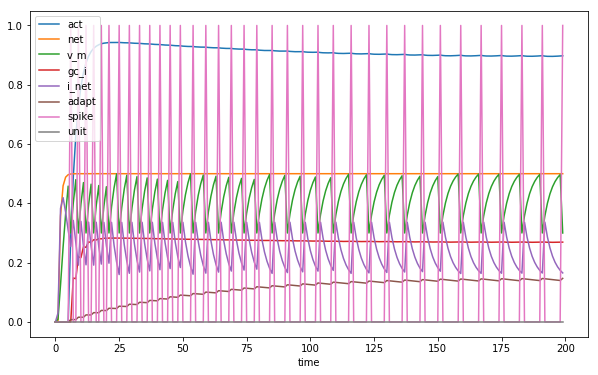

In [4]:
wholeLog, partLog = net.logs(freq="cycle", name="output")
partLog.plot(x = 'time', figsize = (10, 6))

# One to Many Neuron Network

In [5]:
# Define projection spec to have random weights
projn_spec = sp.ProjnSpec(
    dist=rd.Gaussian(mean=0.5, var=0.3)
)

### Network Creation

In [6]:
# Create the network
net = nt.Net()

# Create our layers and projections
net.new_layer("input", 1, layer_spec)
net.new_layer("output", 10, layer_spec)
net.new_projn("proj1", "input", "output", spec=projn_spec)

### Run Network

In [7]:
# Clamp inputs
net.clamp_layer(name = "input", acts = [1])

# Run 200 cycles
for i in range(100):
    net.cycle()

### Graphing

Text(0.5,0,'Time')

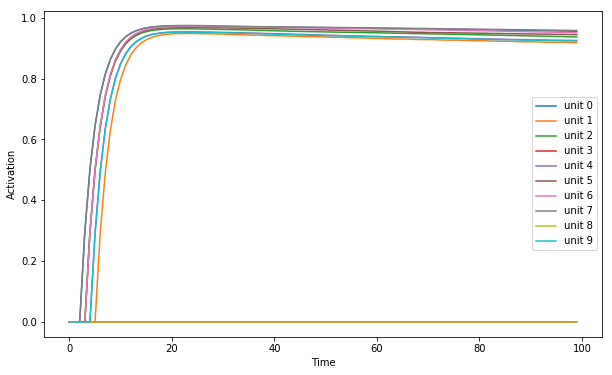

In [8]:
whole_log, part_log = net.logs(freq="cycle", name="output")

fig, ax = plt.subplots(figsize=(10,6))
for name, group in part_log.groupby("unit"):
    group.plot(x="time", y="act", ax=ax, label="unit " + str(name))
ax.set_ylabel("Activation")
ax.set_xlabel("Time")

# Multiple Layers

### Network Creation

In [9]:
# Create the network
net = nt.Net()

# Create our layers and projections
net.new_layer("input", 1, layer_spec)
net.new_layer("middle", 3, layer_spec)
net.new_layer("output", 5, layer_spec)
net.new_projn("proj1", "input", "middle", spec=projn_spec)
net.new_projn("proj2", "middle", "output", spec=projn_spec)
net.new_projn("proj3", "input", "output", spec=projn_spec)

### Run Network

In [10]:
# Clamp inputs
net.clamp_layer(name = "input", acts = [1])

# Run 200 cycles
for i in range(100):
    net.cycle()

### Logging

In [11]:
whole_log_in, part_log_in = net.logs(freq="cycle", name="input")
whole_log_mid, part_log_mid = net.logs(freq="cycle", name="middle")
whole_log_out, part_log_out = net.logs(freq="cycle", name="output")

### Plotting

In [12]:
# Function to plot data for a certain attribute for each unit of layer
def plot_by_unit(axes: List[matplotlib.axes.Axes], 
                 log: pd.DataFrame, attr: str, title: str, location: List):
    for name, group in log.groupby("unit"):
        group.plot(x="time", y=attr, ax=axes[location], 
                   title = title, label="unit " + str(name))

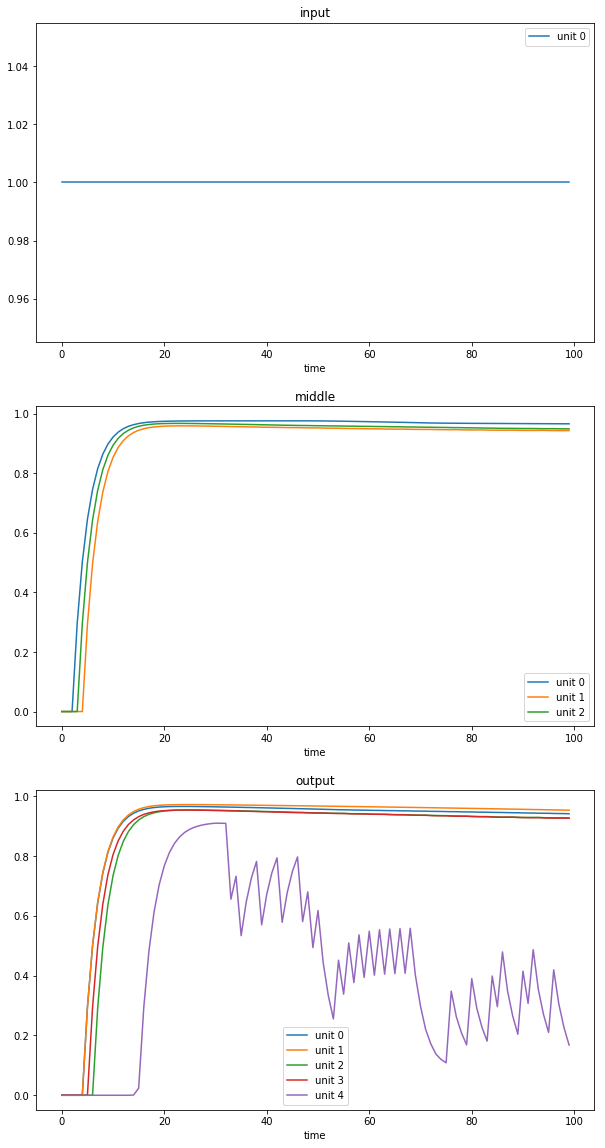

In [13]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,20))
attr = "act"
plot_by_unit(axes=ax, log=part_log_in, attr=attr, title="input", location=0)
plot_by_unit(axes=ax, log=part_log_mid, attr=attr, title="middle", location=1)
plot_by_unit(axes=ax, log=part_log_out, attr=attr, title="output", location=2)